In [2]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = Symbol('x')# x sada postaje simbolicka prom

In [4]:
y = (x-3)**2 #funkcija

In [6]:
dy = y.diff(x) #prvi izvod fje y

In [17]:
dy

2*x - 6

In [8]:
def plotF():
    space = np.linspace(-5,5,100)
    data = np.array([N(y.subs(x,value)) for value in space])
    plt.plot(space, data)
    plt.show()

t1 = t0 - a*dy(t0)

In [9]:
t0 = 84 #pocetna tacka
t1 = 0
a = 0.01

In [10]:
iteracija = 0
provera = 0
preciznost = 1/1000000

In [11]:
plot = True
iteracijaMaks = 10000 #najveci broj iteracija posle kojih treba da se odustane

In [12]:
divergencijaMaks = 50 #parametar za sprecavanje divergencije

Broj iteracija 709 t1= 3.00004872733784


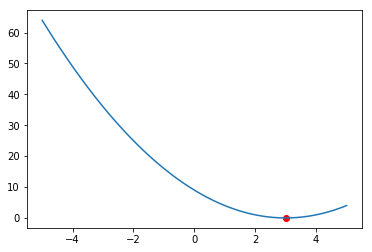

In [16]:
while True:
    t1 = t0 - a*N(dy.subs(x, t0)).evalf()
    #dy.subs direktno menja t0 da bismo izracunali dy(t0)
    iteracija+=1 #povecaj broj iteracija
    
    #ako ima previse iteracija to znaci da verovatno param nisu ok
    if iteracija>iteracijaMaks:
        print("Previse iteracija")
        break
    
    #sada ide provera da li t0 > t1 ako nije onda dozvoljavamo
    #najvise 50 divergiranja
    if t0<t1:
        print("t0 divergira")
        provera+=1
        if provera>divergencijaMaks:
            print("Previse iteracija (%s), t0 divergira"%divergencijaMaks)
            print("Manje a ili proveriti da li fja konvekna")
            plot = False
            break
    #sada ide uslov kojim mi zakljucujemo da t0 konvergira
    #to je zapravo ovo t0-t1< preciznosti i tako izlazimo iz petlje
    if abs(t0-t1)<preciznost:
        break
    
    #obnavlajmo vrednost za sledecu iteracijuw
    t0=t1
    
if plot:
    print("Broj iteracija",iteracija,"t1=",t1)
    plt.plot(t0,N(y.subs(x,t0)).evalf(),marker='o',color='r')
    plotF()